# **Titanic Shipwreck.**
**Use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.**

**Libraries**

In [172]:
import pandas as pd
from pandas_profiling import ProfileReport
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

**Load the data**

In [173]:
titanic_train = pd.read_csv('train.csv')
titanic_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [174]:
titanic_test = pd.read_csv('test.csv')
titanic_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


**Check for missing values**

In [175]:
def print_missing_values(dataset):
    
    df = pd.DataFrame(dataset)

    missing_values_count = df.isnull().sum()
    missing_values_percentage = (missing_values_count / len(df)) * 100

    missing_values_table = pd.DataFrame({
        'Count': missing_values_count,
        'Percentage': missing_values_percentage
    })

    missing_values_table = missing_values_table[missing_values_table['Count'] > 0]

    print("Columns with missing values:")
    print()
    print(missing_values_table)

print_missing_values(titanic_train)

Columns with missing values:

          Count  Percentage
Age         177   19.865320
Cabin       687   77.104377
Embarked      2    0.224467


**Check for duplicates**

In [176]:
titanic_train.duplicated().sum()

0

In [177]:
def find_duplicates(data):

  df = pd.DataFrame(data)

  duplicate_rows = df[df.duplicated()]

  print(duplicate_rows)

find_duplicates(titanic_train)

Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []


## **Initial EDA**

In [178]:
# create a data report
#profile = ProfileReport(titanic_train)

#profile.to_file('train_report.html')

From the data report, `Cabin` has a high number of  missing values thus it'll be dropped.<br>
`Age` has 177 missing values and this rows will be dropped.<br>
`Embarked` has only 2 missing values which will be filled with the mode.

# **Cleaning**

In [179]:
# dropping column
titanic_train.drop(['Cabin','Fare','Ticket','Name', 'PassengerId'], axis=1, inplace=True)

# dropping missing values
titanic_train["Age"].fillna(titanic_train["Age"].mean(), inplace=True)
titanic_train["Age"] = titanic_train["Age"].astype(int)

In [180]:
titanic_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22,1,0,S
1,1,1,female,38,1,0,C
2,1,3,female,26,0,0,S
3,1,1,female,35,1,0,S
4,0,3,male,35,0,0,S
...,...,...,...,...,...,...,...
886,0,2,male,27,0,0,S
887,1,1,female,19,0,0,S
888,0,3,female,29,1,2,S
889,1,1,male,26,0,0,C


### **Test Data**

In [181]:
titanic_test.drop(['Cabin','Fare','Ticket','Name'], axis=1, inplace=True)
titanic_test["Age"].fillna(titanic_test["Age"].mean(), inplace=True)
titanic_test["Age"] = titanic_test["Age"].astype(int)

In [182]:
titanic_test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked
0,892,3,male,34,0,0,Q
1,893,3,female,47,1,0,S
2,894,2,male,62,0,0,Q
3,895,3,male,27,0,0,S
4,896,3,female,22,1,1,S
...,...,...,...,...,...,...,...
413,1305,3,male,30,0,0,S
414,1306,1,female,39,0,0,C
415,1307,3,male,38,0,0,S
416,1308,3,male,30,0,0,S


# **EDA**

In [183]:
def distribution(df, col):
    sns.histplot(df, x=col)
    plt.title(f'Distribution of {col}')
    plt.show()

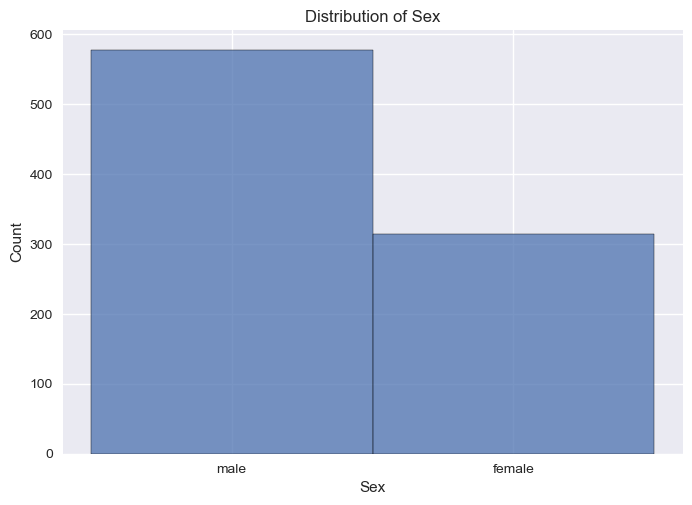

In [184]:
# Distribution of features in the clean data
distribution(titanic_train, 'Sex')

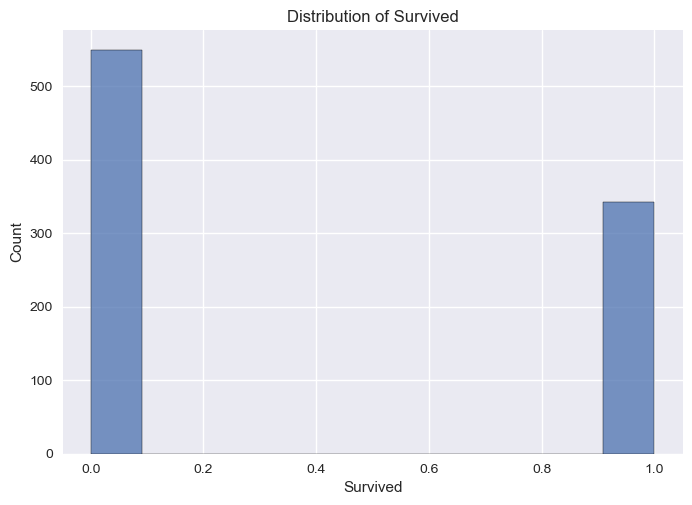

In [185]:
distribution(titanic_train, 'Survived')

In [186]:
titanic_train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [187]:
titanic_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22,1,0,S
1,1,1,female,38,1,0,C
2,1,3,female,26,0,0,S
3,1,1,female,35,1,0,S
4,0,3,male,35,0,0,S
...,...,...,...,...,...,...,...
886,0,2,male,27,0,0,S
887,1,1,female,19,0,0,S
888,0,3,female,29,1,2,S
889,1,1,male,26,0,0,C


# **Feature Engineering**

### **Test Data**

In [188]:
titanic_test['Pclass'] = titanic_test["Pclass"].replace([1,2,3], ['Upper', 'Middle', 'Lower'])
titanic_test['Embarked'] = titanic_test["Embarked"].replace(['S', 'C', 'Q'], ['Southampton', 'Cherbourg', 'Queenstown'])

In [189]:
titanic_test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked
0,892,Lower,male,34,0,0,Queenstown
1,893,Lower,female,47,1,0,Southampton
2,894,Middle,male,62,0,0,Queenstown
3,895,Lower,male,27,0,0,Southampton
4,896,Lower,female,22,1,1,Southampton
...,...,...,...,...,...,...,...
413,1305,Lower,male,30,0,0,Southampton
414,1306,Upper,female,39,0,0,Cherbourg
415,1307,Lower,male,38,0,0,Southampton
416,1308,Lower,male,30,0,0,Southampton


In [190]:
print_missing_values(titanic_test)

Columns with missing values:

Empty DataFrame
Columns: [Count, Percentage]
Index: []


In [191]:
titanic_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22,1,0,S
1,1,1,female,38,1,0,C
2,1,3,female,26,0,0,S
3,1,1,female,35,1,0,S
4,0,3,male,35,0,0,S
...,...,...,...,...,...,...,...
886,0,2,male,27,0,0,S
887,1,1,female,19,0,0,S
888,0,3,female,29,1,2,S
889,1,1,male,26,0,0,C


In [192]:
titanic_train.dtypes

Survived     int64
Pclass       int64
Sex         object
Age          int32
SibSp        int64
Parch        int64
Embarked    object
dtype: object

In [193]:
titanic_train['Pclass'] = titanic_train["Pclass"].replace([1,2,3], ['Upper', 'Middle', 'Lower'])
titanic_train['Embarked'] = titanic_train["Embarked"].replace(['S', 'C', 'Q'], ['Southampton', 'Cherbourg', 'Queenstown'])

In [194]:
titanic_train.Embarked.value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: Embarked, dtype: int64

In [195]:
titanic_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,Lower,male,22,1,0,Southampton
1,1,Upper,female,38,1,0,Cherbourg
2,1,Lower,female,26,0,0,Southampton
3,1,Upper,female,35,1,0,Southampton
4,0,Lower,male,35,0,0,Southampton
...,...,...,...,...,...,...,...
886,0,Middle,male,27,0,0,Southampton
887,1,Upper,female,19,0,0,Southampton
888,0,Lower,female,29,1,2,Southampton
889,1,Upper,male,26,0,0,Cherbourg


In [196]:
# One-Hot Encode Categorical Columns
# from sklearn.preprocessing import OneHotEncoder

# cat_columns = ['Pclass', 'Sex', 'Embarked']
# ohe = OneHotEncoder(categories = 'auto', sparse = False, handle_unknown='ignore')

# ohe.fit(titanic_train[cat_columns])

# new_cat_columns = ohe.get_feature_names(input_features=cat_columns)

# columns = pd.DataFrame(ohe.fit_transform(titanic_train[cat_columns]), columns = new_cat_columns, index=titanic_train.index)

# titanic_train = pd.concat([titanic_train.drop(cat_columns, axis=1), columns], axis=1)

In [197]:
titanic_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,Lower,male,22,1,0,Southampton
1,1,Upper,female,38,1,0,Cherbourg
2,1,Lower,female,26,0,0,Southampton
3,1,Upper,female,35,1,0,Southampton
4,0,Lower,male,35,0,0,Southampton
...,...,...,...,...,...,...,...
886,0,Middle,male,27,0,0,Southampton
887,1,Upper,female,19,0,0,Southampton
888,0,Lower,female,29,1,2,Southampton
889,1,Upper,male,26,0,0,Cherbourg


In [198]:
titanic_train = pd.get_dummies(titanic_train)
titanic_train

,Survived,Age,SibSp,Parch,Pclass_Lower,Pclass_Middle,Pclass_Upper,Sex_female,Sex_male,Embarked_Cherbourg,Embarked_Queenstown,Embarked_Southampton
0,0,22,1,0,1,0,0,0,1,0,0,1
1,1,38,1,0,0,0,1,1,0,1,0,0
2,1,26,0,0,1,0,0,1,0,0,0,1
3,1,35,1,0,0,0,1,1,0,0,0,1
4,0,35,0,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27,0,0,0,1,0,0,1,0,0,1
887,1,19,0,0,0,0,1,1,0,0,0,1
888,0,29,1,2,1,0,0,1,0,0,0,1
889,1,26,0,0,0,0,1,0,1,1,0,0


**Normalization**

In [199]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

columns_to_scale = ['Age', 'SibSp', 'Parch']


titanic_train[columns_to_scale] = scaler.fit_transform(titanic_train[columns_to_scale])

titanic_train

,Survived,Age,SibSp,Parch,Pclass_Lower,Pclass_Middle,Pclass_Upper,Sex_female,Sex_male,Embarked_Cherbourg,Embarked_Queenstown,Embarked_Southampton
0,0,0.2750,0.125,0.000000,1,0,0,0,1,0,0,1
1,1,0.4750,0.125,0.000000,0,0,1,1,0,1,0,0
2,1,0.3250,0.000,0.000000,1,0,0,1,0,0,0,1
3,1,0.4375,0.125,0.000000,0,0,1,1,0,0,0,1
4,0,0.4375,0.000,0.000000,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0.3375,0.000,0.000000,0,1,0,0,1,0,0,1
887,1,0.2375,0.000,0.000000,0,0,1,1,0,0,0,1
888,0,0.3625,0.125,0.333333,1,0,0,1,0,0,0,1
889,1,0.3250,0.000,0.000000,0,0,1,0,1,1,0,0


## **MODELING**

In [200]:
X = titanic_train.drop('Survived', axis=1)
y = titanic_train['Survived']

In [201]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Baseline Model

In [202]:
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')

In [203]:
logit.fit(X_train, y_train)


LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')

In [204]:
y_pred = logit.predict(X_test)

In [205]:
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, confusion_matrix

In [206]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8100558659217877

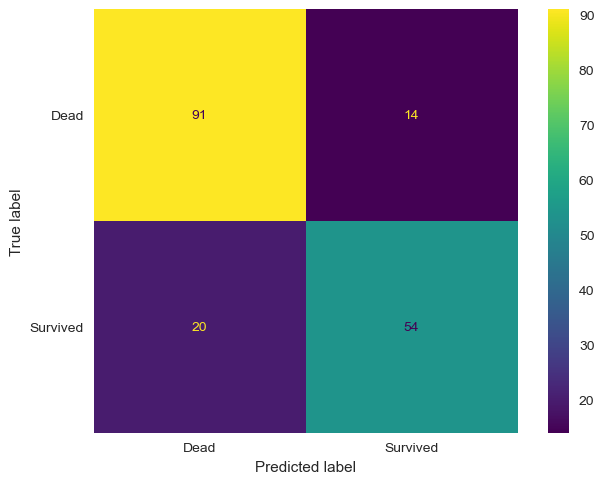

In [207]:
labels = {0: 'Dead', 1: 'Survived'}
labels = [labels[key] for key in sorted(labels.keys())]
cf = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cf, display_labels=labels)


disp.plot()
plt.grid(False)


plt.show()

In [209]:
clf = classification_report(y_test, y_pred)
print("Classification Report:\n", clf)

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.87      0.84       105
           1       0.79      0.73      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

